In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
pd.options.display.max_columns=1000
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/lego/df.csv')

In [3]:
df.head()

,set_num,set_name,year,theme_id,num_parts,set_num_len,set_name_len,theme_name,id,part_num,color_id,quantity,color_name,part_name,is_trans,theme_name_len,part_num_len,color_name_len,part_name_len,is_ninjago
0,001-1,Gears,1965,1,43,5,5,Technic,24696,132a,7,4,Light Gray,Tyre Smooth Old Style - Small,0,7,4,10,29,0
1,001-1,Gears,1965,1,43,5,5,Technic,24696,3020,15,4,White,Plate 2 x 4,0,7,4,5,11,0
2,001-1,Gears,1965,1,43,5,5,Technic,24696,3062c,15,1,White,"Brick Round 1 x 1 Solid Stud, No Bottom Groove",0,7,5,5,46,0
3,001-1,Gears,1965,1,43,5,5,Technic,24696,3404bc01,15,4,White,"Turntable 4 x 4 - Old Type Complete, Perfectly...",0,7,8,5,52,0
4,001-1,Gears,1965,1,43,5,5,Technic,24696,36,7,4,Light Gray,Tyre Smooth Old Style - Large,0,7,2,10,29,0


In [4]:
df.shape

(919288, 20)

In [5]:
df.columns

Index(['set_num', 'set_name', 'year', 'theme_id', 'num_parts', 'set_num_len',
       'set_name_len', 'theme_name', 'id', 'part_num', 'color_id', 'quantity',
       'color_name', 'part_name', 'is_trans', 'theme_name_len', 'part_num_len',
       'color_name_len', 'part_name_len', 'is_ninjago'],
      dtype='object')

In [6]:
target_names = 'set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()
target_names

['set_num',
 'set_name',
 'theme_id',
 'theme_name',
 'id',
 'part_num',
 'color_name',
 'part_name',
 'theme_name_len',
 'is_ninjago']

In [7]:
fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

In [8]:
X = df[fn]
y = df['is_ninjago']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=1)

In [10]:
hyper_table_C_test = list()
fn = list()

for i, name in tqdm(enumerate(X.columns), total=len(X.columns)):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)
    for c in np.arange(-5, 5):
        model = LogisticRegression(C=10.0**c, random_state=1, class_weight='balanced')
        model.fit(X_train[fn], y_train)
        s_train = model.score(X_train[fn], y_train)
        s_test = model.score(X_test[fn], y_test)
        hyper_table_C_test.append(dict(C=model.C,
                                    train_score=s_train, 
                                    test_score=s_test,
                                    model=model, 
                                    num_columns=df[fn].shape[1]))

 70%|██████████████████████████████████████████████████████████                         | 7/10 [04:08<02:21, 47.33s/it]C:\Users\marki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\marki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for 

C:\Users\marki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\marki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [11]:
htC = pd.DataFrame(hyper_table_C_test).sort_values('test_score', ascending=False)
htC

,C,train_score,test_score,model,num_columns
16,10.00000,0.739098,0.739103,"LogisticRegression(C=10.0, class_weight='balan...",2
11,0.00010,0.739098,0.739103,"LogisticRegression(C=0.0001, class_weight='bal...",2
18,1000.00000,0.739098,0.739103,"LogisticRegression(C=1000.0, class_weight='bal...",2
17,100.00000,0.739098,0.739103,"LogisticRegression(C=100.0, class_weight='bala...",2
15,1.00000,0.739098,0.739103,"LogisticRegression(class_weight='balanced', ra...",2
...,...,...,...,...,...
5,1.00000,0.038428,0.039966,"LogisticRegression(class_weight='balanced', ra...",1
4,0.10000,0.038428,0.039966,"LogisticRegression(C=0.1, class_weight='balanc...",1
3,0.01000,0.038428,0.039966,"LogisticRegression(C=0.01, class_weight='balan...",1
2,0.00100,0.038428,0.039966,"LogisticRegression(C=0.001, class_weight='bala...",1


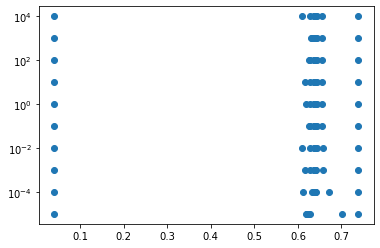

In [12]:
plt.scatter(htC['test_score'], htC['C'])
plt.yscale('log')
plt.show()

In [13]:
htC = htC.sort_values('C')
htC

,C,train_score,test_score,model,num_columns
0,0.00001,0.038428,0.039966,"LogisticRegression(C=1e-05, class_weight='bala...",1
40,0.00001,0.629116,0.627169,"LogisticRegression(C=1e-05, class_weight='bala...",5
20,0.00001,0.700863,0.700932,"LogisticRegression(C=1e-05, class_weight='bala...",3
30,0.00001,0.625536,0.623710,"LogisticRegression(C=1e-05, class_weight='bala...",4
60,0.00001,0.625756,0.623372,"LogisticRegression(C=1e-05, class_weight='bala...",7
...,...,...,...,...,...
79,10000.00000,0.640050,0.637960,"LogisticRegression(C=10000.0, class_weight='ba...",8
99,10000.00000,0.611032,0.609797,"LogisticRegression(C=10000.0, class_weight='ba...",10
39,10000.00000,0.640564,0.637840,"LogisticRegression(C=10000.0, class_weight='ba...",4
59,10000.00000,0.641284,0.639483,"LogisticRegression(C=10000.0, class_weight='ba...",6


In [14]:
htC1 = htC[htC['num_columns'] == 4]
htC1

,C,train_score,test_score,model,num_columns
30,0.00001,0.625536,0.623710,"LogisticRegression(C=1e-05, class_weight='bala...",4
31,0.00010,0.640686,0.637916,"LogisticRegression(C=0.0001, class_weight='bal...",4
32,0.00100,0.639892,0.637079,"LogisticRegression(C=0.001, class_weight='bala...",4
33,0.01000,0.640444,0.637742,"LogisticRegression(C=0.01, class_weight='balan...",4
34,0.10000,0.640564,0.637840,"LogisticRegression(C=0.1, class_weight='balanc...",4
35,1.00000,0.640564,0.637840,"LogisticRegression(class_weight='balanced', ra...",4
36,10.00000,0.640564,0.637840,"LogisticRegression(C=10.0, class_weight='balan...",4
37,100.00000,0.640564,0.637840,"LogisticRegression(C=100.0, class_weight='bala...",4
38,1000.00000,0.640564,0.637840,"LogisticRegression(C=1000.0, class_weight='bal...",4
39,10000.00000,0.640564,0.637840,"LogisticRegression(C=10000.0, class_weight='ba...",4


In [15]:
hyper_table_C_test2 = list()
fn = list()

for i, name in enumerate(X.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)
    
for c in tqdm(np.arange(-5, 5), total=len(df[fn])):
    model = LogisticRegression(C=10.0**c, random_state=1, class_weight='balanced')
    model.fit(X_train[fn], y_train)
    s_train = model.score(X_train[fn], y_train)
    s_test = model.score(X_test[fn], y_test)
    hyper_table_C_test2.append(dict(C=model.C,
                                train_score=s_train, 
                                test_score=s_test,
                                model=model, 
                                num_columns=df[fn].shape[1]))

  0%|                                                                                       | 0/919288 [00:00<?, ?it/s]C:\Users\marki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
  0%|                                                                          | 1/919288 [00:09<2329:57:55,  9.12s/it]C:\Users\marki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data 

In [16]:
htC2 = pd.DataFrame(hyper_table_C_test2).sort_values('test_score', ascending=False)
htC2

,C,train_score,test_score,model,num_columns
8,1000.00000,0.632857,0.631563,"LogisticRegression(C=1000.0, class_weight='bal...",10
4,0.10000,0.625583,0.625570,"LogisticRegression(C=0.1, class_weight='balanc...",10
7,100.00000,0.625690,0.624787,"LogisticRegression(C=100.0, class_weight='bala...",10
0,0.00001,0.622971,0.621871,"LogisticRegression(C=1e-05, class_weight='bala...",10
5,1.00000,0.618144,0.617390,"LogisticRegression(class_weight='balanced', ra...",10
2,0.00100,0.617408,0.616595,"LogisticRegression(C=0.001, class_weight='bala...",10
6,10.00000,0.617535,0.616084,"LogisticRegression(C=10.0, class_weight='balan...",10
1,0.00010,0.612357,0.611483,"LogisticRegression(C=0.0001, class_weight='bal...",10
9,10000.00000,0.611032,0.609797,"LogisticRegression(C=10000.0, class_weight='ba...",10
3,0.01000,0.609628,0.608263,"LogisticRegression(C=0.01, class_weight='balan...",10


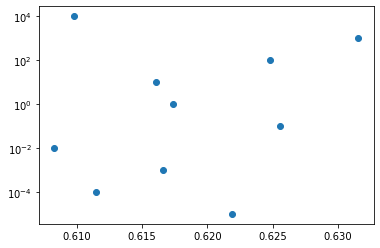

In [17]:
plt.scatter(htC2['test_score'], htC2['C'])
plt.yscale('log')
plt.show()

In [18]:
hyper_table = list()
fn = list()
for i, name in tqdm(enumerate(X.columns), total=len(X.columns)):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)
    model = LogisticRegression(random_state=1, class_weight='balanced')
    model.fit(X_train[fn], y_train)
    s_train = model.score(X_train[fn], y_train)
    s_test = model.score(X_test[fn], y_test)
    hyper_table.append(dict(sample='none',
                            desc=str(fn), 
                            train_score=s_train, 
                            test_score=s_test,
                            # test_score_0='none', 
                            # test_score_1='none',
                            # train_score_0='none',
                            # train_score_1='none',
                            model=model, 
                            num_features=df[fn].shape[1], 
                            num_rows=df[fn].shape[0], 
                            last_feature=fn[-1]))

 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:41<00:06,  6.65s/it]C:\Users\marki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:50<00:00,  5.10s/it]


In [19]:
model_rf = RandomForestClassifier(n_estimators=100, random_state = 1,n_jobs=-1)

In [20]:
fn = list()
for i, name in tqdm(enumerate(X.columns), total=len(X.columns)):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)
    model_rf.fit(X_train[fn], y_train)
    s_train = model_rf.score(X_train[fn], y_train)
    s_test = model_rf.score(X_test[fn], y_test)
    hyper_table.append(dict(sample='none', 
                        desc=str(fn), 
                        train_score=s_train, 
                        test_score=s_test,
                        #test_score_0='none', 
                        #test_score_1='none',
                        #train_score_0='none',
                        #train_score_1='none',    
                        C=np.nan,
                        model=model_rf, 
                        num_features=df[fn].shape[1], 
                        num_rows=df[fn].shape[0], 
                        last_feature=fn[-1]))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [05:11<00:00, 31.18s/it]


In [21]:
ht0 = pd.DataFrame(hyper_table).sort_values('test_score', ascending=False)
ht0

,sample,desc,train_score,test_score,model,num_features,num_rows,last_feature,C
13,none,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999401,0.999347,"(DecisionTreeClassifier(max_features='auto', r...",4,919288,set_name_len,NaN
14,none,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999792,0.999162,"(DecisionTreeClassifier(max_features='auto', r...",5,919288,color_id,NaN
15,none,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999861,0.998325,"(DecisionTreeClassifier(max_features='auto', r...",6,919288,quantity,NaN
16,none,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999861,0.997520,"(DecisionTreeClassifier(max_features='auto', r...",7,919288,is_trans,NaN
18,none,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999903,0.996845,"(DecisionTreeClassifier(max_features='auto', r...",9,919288,color_name_len,NaN
17,none,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999903,0.995203,"(DecisionTreeClassifier(max_features='auto', r...",8,919288,part_num_len,NaN
19,none,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999984,0.994757,"(DecisionTreeClassifier(max_features='auto', r...",10,919288,part_name_len,NaN
12,none,"['year', 'num_parts', 'set_num_len']",0.994464,0.994082,"(DecisionTreeClassifier(max_features='auto', r...",3,919288,set_num_len,NaN
11,none,"['year', 'num_parts']",0.993173,0.992951,"(DecisionTreeClassifier(max_features='auto', r...",2,919288,num_parts,NaN
10,none,['year'],0.961572,0.960034,"(DecisionTreeClassifier(max_features='auto', r...",1,919288,year,NaN


In [22]:
ht0.shape

(20, 9)

In [23]:
model = LogisticRegression(random_state=1, class_weight='balanced')
model.fit(X_train[fn], y_train)
y_pred = model.predict(X_test[fn])
y_pred

C:\Users\marki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [24]:
y_pred.sum() / len(y_pred)

0.39061667156174873

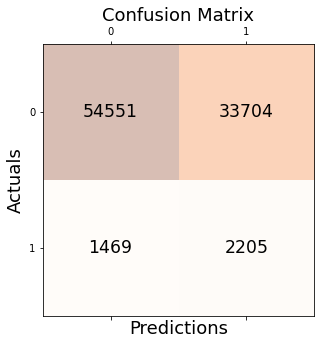

In [25]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [26]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

print('Recall: %.3f' % recall_score(y_test, y_pred))

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.061
Recall: 0.600
Accuracy: 0.617
F1 Score: 0.111


10


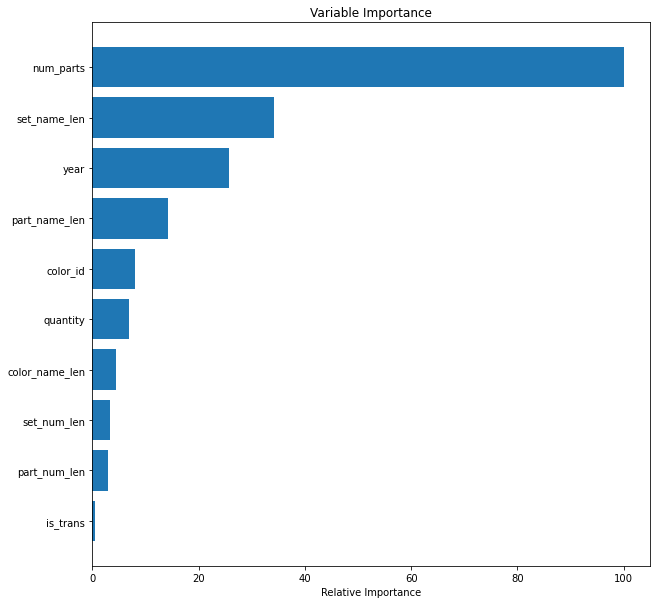

In [27]:
feature_importance = model_rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df[fn].columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [28]:
ht0.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/lego/ht0.csv', index=False)

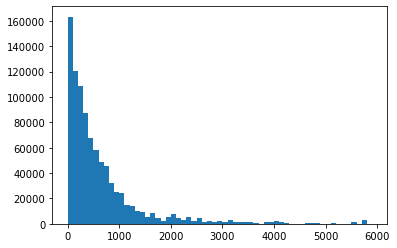

In [31]:
plt.hist(df['num_parts'], bins=range(0, 6000, 100))
plt.show()

In [34]:
temp = df[df['is_ninjago'].astype(bool)]
temp

,set_num,set_name,year,theme_id,num_parts,set_num_len,set_name_len,theme_name,id,part_num,color_id,quantity,color_name,part_name,is_trans,theme_name_len,part_num_len,color_name_len,part_name_len,is_ninjago
74598,111901-1,Garmadon,2019,435,10,8,8,Ninjago,34764,21459,179,4,Flat Silver,Weapon Sword / Katana / Shamshir with Capped P...,0,7,5,11,66,1
74599,111902-1,Wu,2019,435,6,8,2,Ninjago,39226,63965,297,1,Pearl Gold,Bar 6L with Stop Ring,0,7,5,10,21,1
74600,111903-1,Kai vs. Wyplash,2019,435,13,8,15,Ninjago,39213,21459,179,1,Flat Silver,Weapon Sword / Katana / Shamshir with Capped P...,0,7,5,11,66,1
74601,111903-1,Kai vs. Wyplash,2019,435,13,8,15,Ninjago,39213,60752,28,1,Dark Tan,Weapon Sword / Scimitar Notched Blade,0,7,5,8,37,1
74602,111904-1,Jay vs. Lasha,2019,435,12,8,13,Ninjago,42111,59229,70,1,Reddish Brown,Weapon Sword Scythe Blade with Clip Pommel,0,7,5,13,42,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918431,TRUNINJAGO-4,Micro Morro Dragon,2015,435,29,12,18,Ninjago,15797,54200,0,1,Black,Slope 30° 1 x 1 x 2/3 (Cheese Slope),0,7,5,5,36,1
918432,TRUNINJAGO-4,Micro Morro Dragon,2015,435,29,12,18,Ninjago,15797,54200,72,4,Dark Bluish Gray,Slope 30° 1 x 1 x 2/3 (Cheese Slope),0,7,5,16,36,1
918433,TRUNINJAGO-4,Micro Morro Dragon,2015,435,29,12,18,Ninjago,15797,59900,0,1,Black,Cone 1 x 1 [Top Groove],0,7,5,5,23,1
918434,TRUNINJAGO-4,Micro Morro Dragon,2015,435,29,12,18,Ninjago,15797,6133,0,2,Black,"Creature Body Part, Dragon Wing",0,7,4,5,31,1


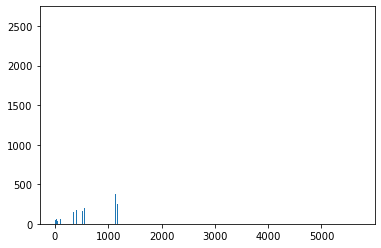

In [37]:
plt.hist(temp['num_parts'], bins=6000)
plt.show()